## 데이터 분석

##### 1-1. 라이브러리/데이터 불러오기

In [ ]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
%matplotlib inline 
# 위 코드가 없으면 plt가 안그려지니 주의하자!
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import seaborn as sns
from IPython.display import Image
import pydotplus
import pandas as pd
import numpy as np
import os
from pandas_profiling import ProfileReport

In [ ]:
# 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/dataset/pasteurizer.csv')
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
5,2020-03-04 8:30,1.0,1.0,585.0,536.0,OK
6,2020-03-04 9:00,1.0,1.0,585.0,537.0,OK
7,2020-03-04 9:30,1.0,1.0,585.0,538.0,OK
8,2020-03-04 10:00,1.0,1.0,585.0,541.0,OK
9,2020-03-04 10:30,1.0,1.0,585.0,543.0,OK


##### 1-2. 데이터 종류 및 개수 확인

In [ ]:
column = df.columns # 칼럼명 확인
print("📌info")
df.info() # 데이터 정보 확인
describe = df.describe() # 요약 통계량 확인
shape = df.shape # 데이터 개수 확인 (행, 열)
INSP = df['INSP'].value_counts() # INSP 칼럼의 데이터 개수 확인
null_count = df.isna().sum() # 칼럼별 null 개수 확인

print("\n📌column\n", column,"\n")
print("📌describe\n", describe,"\n")
print("📌shape\n", shape,"\n")
print("📌INSP\n", INSP,"\n")
print("📌null_count\n", null_count,"\n")

📌info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210794 entries, 0 to 210793
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STD_DT              210794 non-null  object 
 1   MIXA_PASTEUR_STATE  11135 non-null   float64
 2   MIXB_PASTEUR_STATE  10255 non-null   float64
 3   MIXA_PASTEUR_TEMP   201423 non-null  float64
 4   MIXB_PASTEUR_TEMP   198802 non-null  float64
 5   INSP                210794 non-null  object 
dtypes: float64(4), object(2)
memory usage: 9.6+ MB

📌column
 Index(['STD_DT', 'MIXA_PASTEUR_STATE', 'MIXB_PASTEUR_STATE',
       'MIXA_PASTEUR_TEMP', 'MIXB_PASTEUR_TEMP', 'INSP'],
      dtype='object') 

📌describe
        MIXA_PASTEUR_STATE  MIXB_PASTEUR_STATE  MIXA_PASTEUR_TEMP  \
count        1.113500e+04        10255.000000      201423.000000   
mean         5.032693e+04          633.200390         566.867528   
std          5.286901e+05         6408.270847          69.061703

##### 1-3. 데이터 정제(전처리)

In [ ]:
# 결측치 제거 -> null 값이 있는 행 삭제
df = df.dropna()

In [ ]:
# 결측치 제거 결과 확인
df.isna().sum() 

STD_DT                0
MIXA_PASTEUR_STATE    0
MIXB_PASTEUR_STATE    0
MIXA_PASTEUR_TEMP     0
MIXB_PASTEUR_TEMP     0
INSP                  0
dtype: int64

(array([9383.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         100.]),
 array([      0. ,  560384.1, 1120768.2, 1681152.3, 2241536.4, 2801920.5,
        3362304.6, 3922688.7, 4483072.8, 5043456.9, 5603841. ]),
 <BarContainer object of 10 artists>)

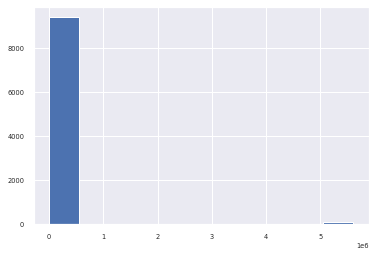

In [ ]:
# 히스토그램 확인 -> 데이터의 분포, 중심 경향, 치우침 정도 파악
plt.hist(df['MIXA_PASTEUR_STATE']) 

In [ ]:
# 특정 칼럼의 unique 값 확인 -> 결과: 1, 5603841, 0
df['MIXA_PASTEUR_STATE'].unique()

array([1.000000e+00, 5.603841e+06, 0.000000e+00])

In [ ]:
# 특정 조건의 값 변경 -> 위에서 0,1인 행만 유지하기 위해 2 이하인 값들에 대해서만 다시 df에 넣는다.
df = df[df.MIXA_PASTEUR_STATE < 2]

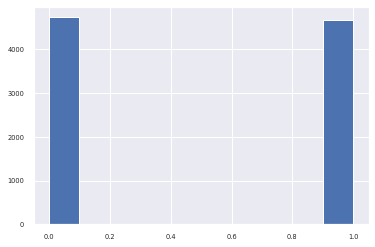

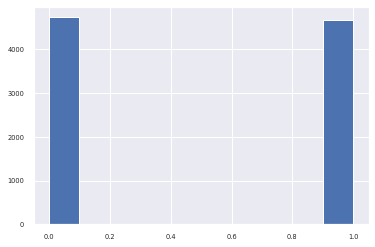

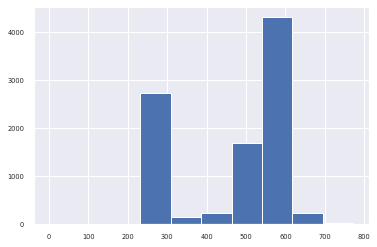

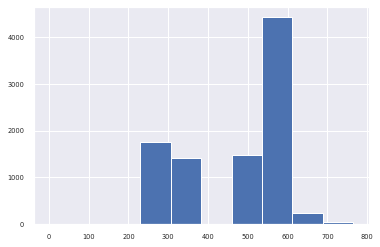

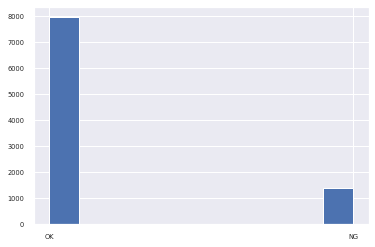

In [ ]:
# 다른 모든 칼럼의 히스토그램 확인
plt.hist(df['MIXA_PASTEUR_STATE']) 
plt.show()
plt.hist(df['MIXB_PASTEUR_STATE'])
plt.show()
plt.hist(df['MIXA_PASTEUR_TEMP'])
plt.show()
plt.hist(df['MIXB_PASTEUR_TEMP'])  
plt.show()
plt.hist(df['INSP'])
plt.show()

##### 1-4. 데이터 특성 파악

array([[<AxesSubplot:title={'center':'MIXA_PASTEUR_STATE'}>,
        <AxesSubplot:title={'center':'MIXB_PASTEUR_STATE'}>],
       [<AxesSubplot:title={'center':'MIXA_PASTEUR_TEMP'}>,
        <AxesSubplot:title={'center':'MIXB_PASTEUR_TEMP'}>]], dtype=object)

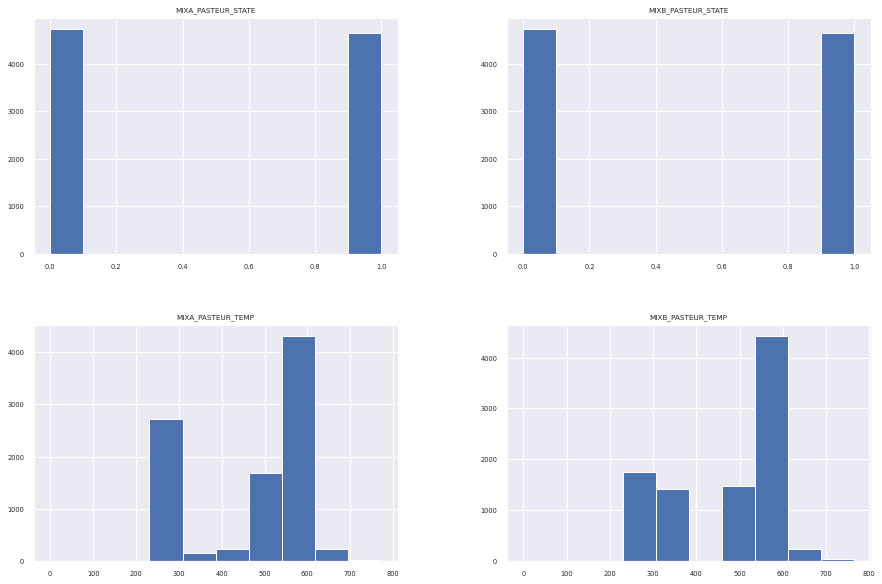

In [ ]:
# 요약 통계
df.hist(bins=10, figsize=(15,10))

In [ ]:
# 특성 간의 상관관계
df.corr()

,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP
MIXA_PASTEUR_STATE,1.000000,1.000000,0.523328,0.465706
MIXB_PASTEUR_STATE,1.000000,1.000000,0.523328,0.465706
MIXA_PASTEUR_TEMP,0.523328,0.523328,1.000000,0.920102
MIXB_PASTEUR_TEMP,0.465706,0.465706,0.920102,1.000000


<AxesSubplot:>

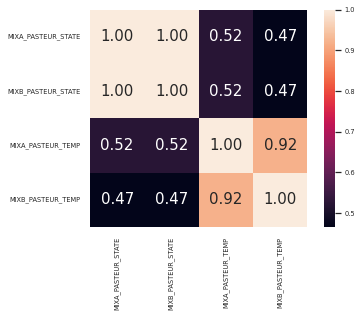

In [ ]:
# 히트맵
names = ['MIXA_PASTEUR_STATE', 'MIXB_PASTEUR_STATE', 'MIXA_PASTEUR_TEMP', 'MIXB_PASTEUR_TEMP']
cm = np.corrcoef(df[names].values.T)
sns.set(font_scale=0.6)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
            annot_kws={'size':15}, yticklabels=names, xticklabels=names)

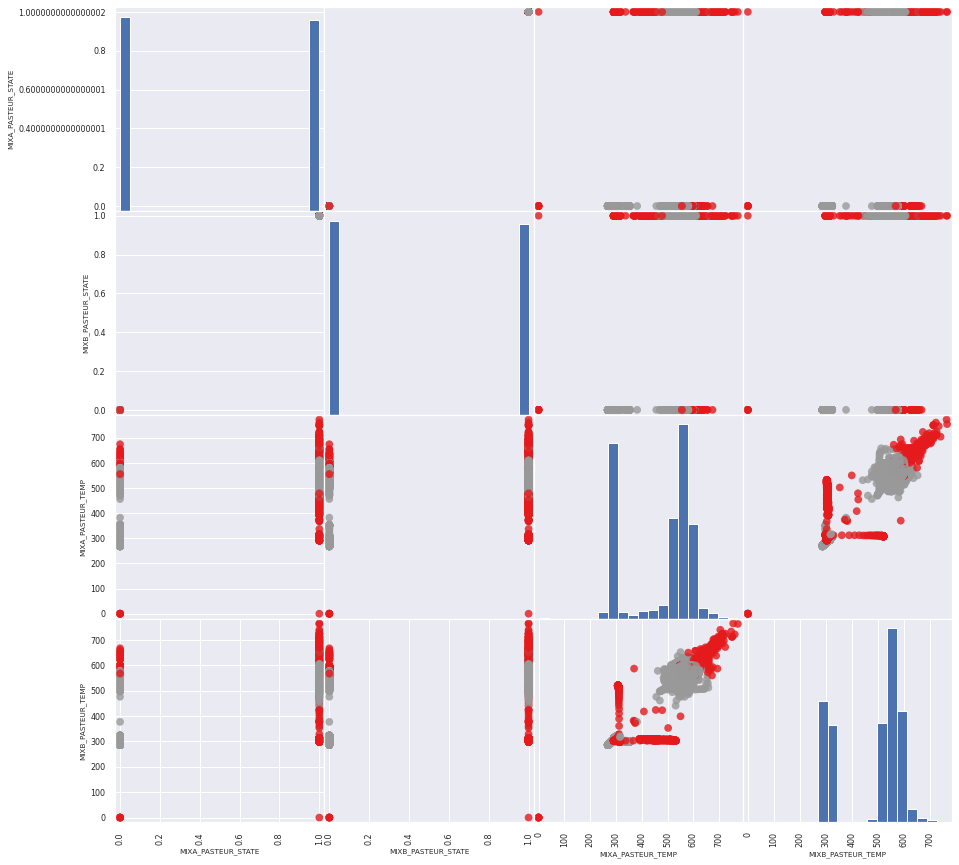

In [ ]:
# 산점도 매트릭스
y = df.iloc[:, -1:].values
y = np.where(y=='OK',1,0)
y = y.ravel()
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), marker='o',
                           hist_kwds={'bins':20}, s=60, alpha=.8, cmap=plt.cm.Set1)
plt.show()

>  ▶ 양품: 회색<br>
>  ▶ 불량: 빨간색<br>
>  <MIXA_PASTEUR_TEMP와 MIXB_PASTEUR_TEMP의 분포> <br>
>  - 특성들 간의 상관관계가 높다.
>  - 양품인 경우: 가운데에 위치.
>  - 불량인 경우: 우측 상단과 ㄴ자 모형으로 패턴 이룸. 